### Author : Nour Shosharah

## Task3-Exploratory Data Analysis - Retail
### objectives
As a business manager, try to find out the weak areas where you can work to make more profit.
What all business problems you can derive by exploring the data?

#### Step 1 - import librires

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


#### Step 2 - Reading the data from source

In [135]:
# url="https://bit.ly/3i4rbWl"
data=pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### Step 3 - Explore Data

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [137]:
data.shape

(9994, 13)

In [138]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [139]:
data=data.drop(columns=['Postal Code'],axis=1)

In [140]:
data.duplicated().sum()

50

In [141]:
data.drop_duplicates(subset=None,keep='first',inplace=True)
data.duplicated().sum()

0

In [142]:
data.select_dtypes(include='object').nunique()


Ship Mode         4
Segment           3
Country           1
City            531
State            49
Region            4
Category          3
Sub-Category     17
dtype: int64

In [143]:
data.Country.unique()

array(['United States'], dtype=object)

here we have only 1 Country United States .

##### distribution of Ship Mode, Segment , Category, Sub-Category

Ship Mode Column



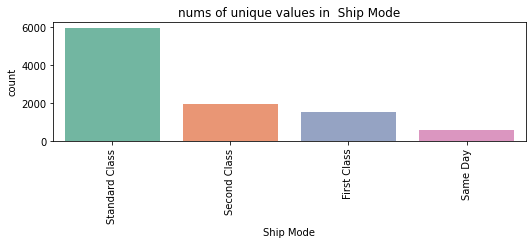

****OBSERVATION****
We have 4 unique values in Ship Mode
The highest is  Standard Class and the lowest is Same Day 
**************************************************
Segment Column



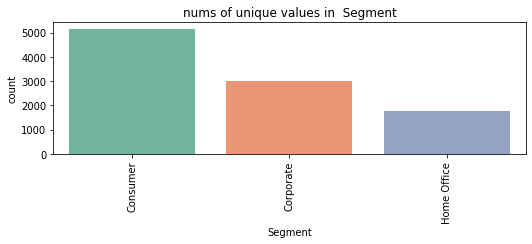

****OBSERVATION****
We have 3 unique values in Segment
The highest is  Consumer and the lowest is Home Office 
**************************************************
Category Column



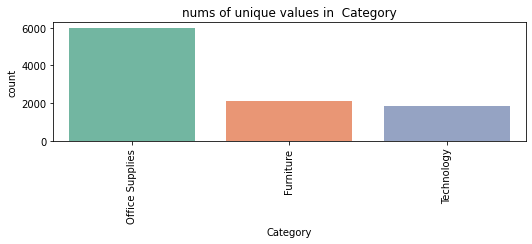

****OBSERVATION****
We have 3 unique values in Category
The highest is  Office Supplies and the lowest is Technology 
**************************************************
Sub-Category Column



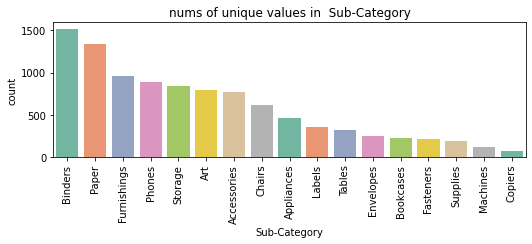

****OBSERVATION****
We have 17 unique values in Sub-Category
The highest is  Binders and the lowest is Copiers 
**************************************************


In [144]:
data_object=data[['Ship Mode', 'Segment',
       'Category', 'Sub-Category']]
def object_col_with_chart(data):
    for col in data.columns:
        plt.Figure(figsize=(10,8))
        print(f"{col} Column")
        print(""*50)

        # print(data[col].value_counts().sort_values(ascending=False))
        sns.countplot(x=data[col],palette = "Set2",order=data[col].value_counts().sort_values(ascending=False).index)
        plt.xticks(rotation=90)
        plt.title(f"nums of unique values in  {col}")
        plt.show()
        print(f"****OBSERVATION****")
        print(f"We have {data[col].nunique()} unique values in {col}")
        print(f"The highest is  {data[col].value_counts().index[0]} and the lowest is {data[col].value_counts().index[-1]} ")
        print("*"*50)

object_col_with_chart(data_object)

##### state distribution

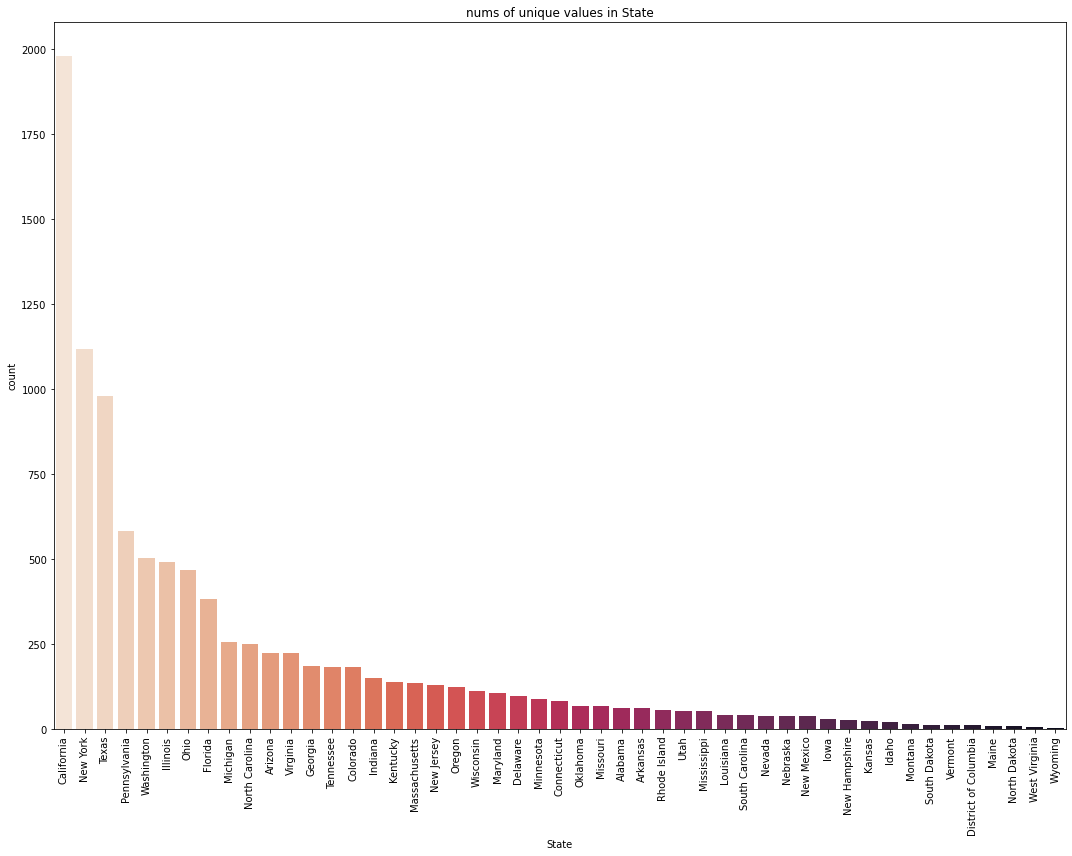

****OBSERVATION****
We have 49 unique values in State
The highest is  California and the lowest is Wyoming 


In [145]:
plt.figure(figsize=(15,12))
sns.countplot(x=data['State'],palette = "rocket_r",order=data['State'].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.title(f"nums of unique values in State")
plt.show()
print(f"****OBSERVATION****")
print(f"We have {data['State'].nunique()} unique values in State")
print(f"The highest is  {data['State'].value_counts().index[0]} and the lowest is {data['State'].value_counts().index[-1]} ")



##### Profit and Sales in Sub-Category

c:\Users\NOUR\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='Sub-Category'>

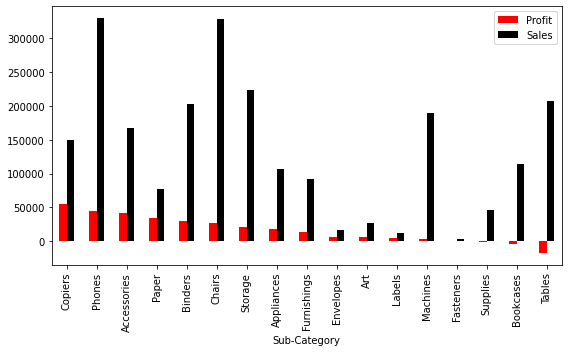

In [146]:
data_profit_per_sub_category=data[['Sub-Category','Profit','Sales',"Category"]].groupby("Sub-Category")["Profit","Sales"].sum().sort_values(by="Profit",ascending=False).plot(kind='bar', color=['red', 'black'],figsize=(8,5));
data_profit_per_sub_category

 **observation** The HIGHEST Sub-Category profit is Copiers , Phones , Accessories , and the LOWEST Sub-Category profit is Tabels , Bookcases , Supplies

c:\Users\NOUR\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



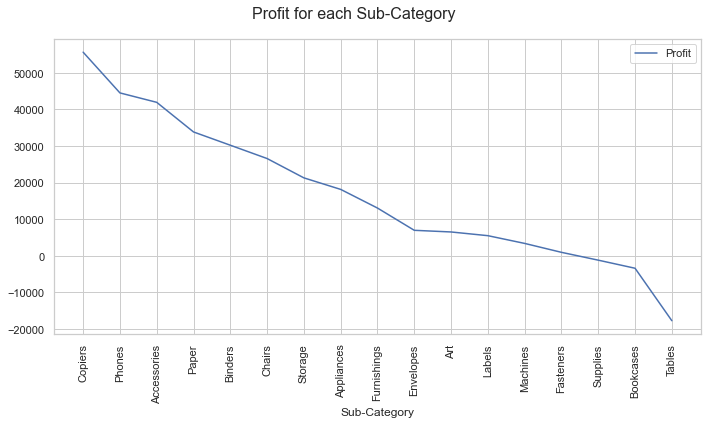

In [147]:
#if we want to plot it as line 
data_profit_per_sub_category=data[['Sub-Category','Profit','Sales']].groupby("Sub-Category")["Profit","Sales"].sum().sort_values(by="Profit",ascending=False)
sns.set(style="whitegrid")
plt.figure(2, figsize=(10,6))
sns.lineplot(x='Sub-Category',y='Profit', data=data_profit_per_sub_category, palette='BuGn',markers =True,label="Profit")
# sns.lineplot(x='Sub-Category',y='Sales', data=data_profit_per_sub_category, palette='Oranges',markers =True,label="Sales")

plt.xticks(rotation=90)
plt.ylabel("")
plt.suptitle('Profit for each Sub-Category', fontsize=16)
plt.show()

##### Profit for Category, Ship mode , Region ,Segment

In [148]:
colors = sns.color_palette('pastel')[0:5]

In [149]:
data_profit_per_category=data[['Category','Profit']].groupby("Category")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)


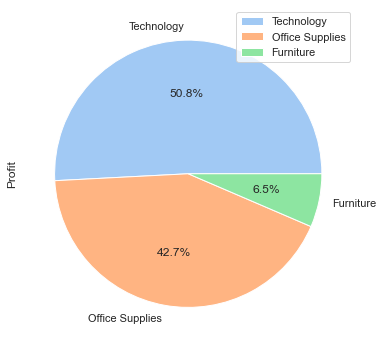

In [150]:
data_profit_per_category.plot.pie(y='Profit',labels=data_profit_per_category['Category'],normalize=True,autopct='%1.1f%%', colors = colors,figsize=(11,5))
plt.legend(loc="upper right")

**observation**
Technology Category is The HIGHEST profit and Furniture is the LOWEST

In [155]:
data_Segment=data[['Segment','Profit']].groupby("Segment")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)


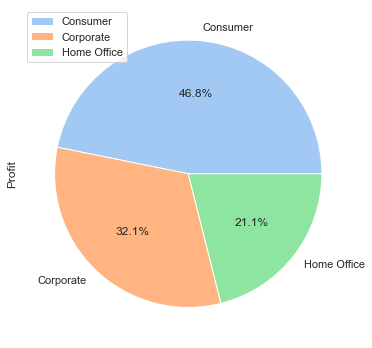

In [156]:
data_Segment.plot.pie(y='Profit',labels=data_Segment['Segment'],normalize=True,autopct='%1.1f%%', colors = colors,figsize=(11,5))
plt.legend(loc="upper left")

**observation**
Consumer  Segment is The HIGHEST profit and Home office is the LOWEST

In [157]:
data_Region=data[['Region','Profit']].groupby("Region")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)


<AxesSubplot:ylabel='Profit'>

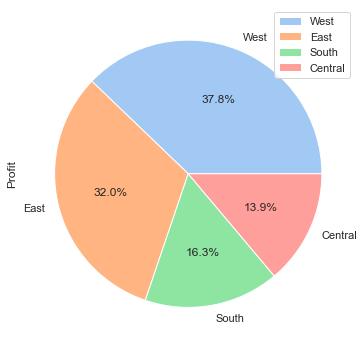

In [160]:
data_Region.plot.pie(y='Profit',labels=data_Region['Region'],normalize=True,autopct='%1.1f%%', colors = colors,figsize=(11,5))

**observation**
West region  is The HIGHEST profit and south is the LOWEST

In [161]:
data_Ship=data[['Ship Mode','Profit']].groupby('Ship Mode')["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)


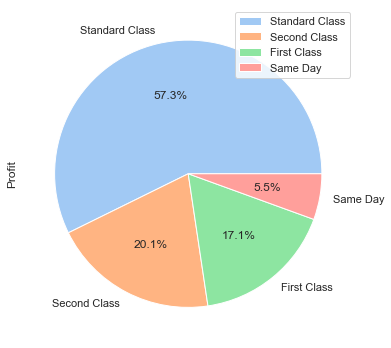

In [162]:
data_Ship.plot.pie(y='Profit',labels=data_Ship['Ship Mode'],normalize=True,autopct='%1.1f%%', colors = colors,figsize=(11,5))
plt.legend(loc="upper right")

**observation**
Standard Class Ship mode is The HIGHEST profit and same Day is the LOWEST

##### Segment wise Sales in each Region

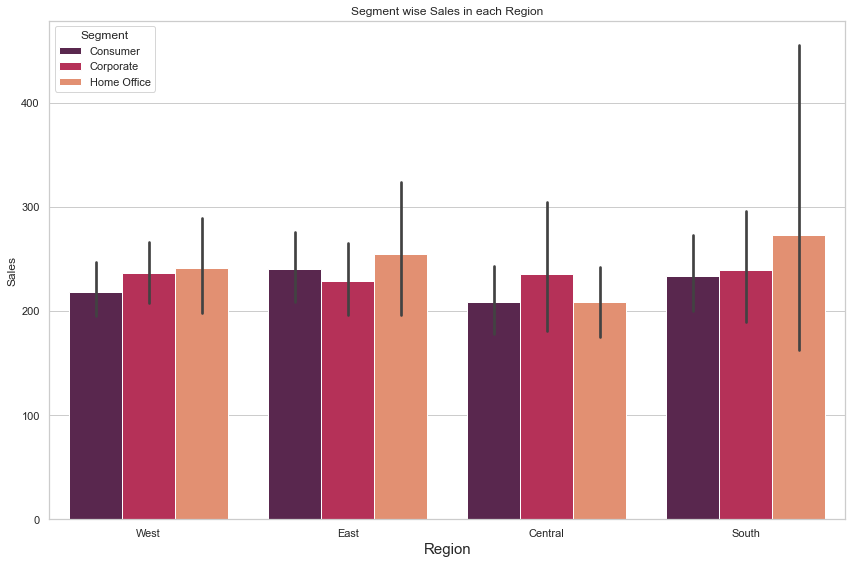

In [163]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=data,hue='Segment',order=data['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()

**Observation**
Segment wise sales are almost same in every region

##### Sales and profit in each state

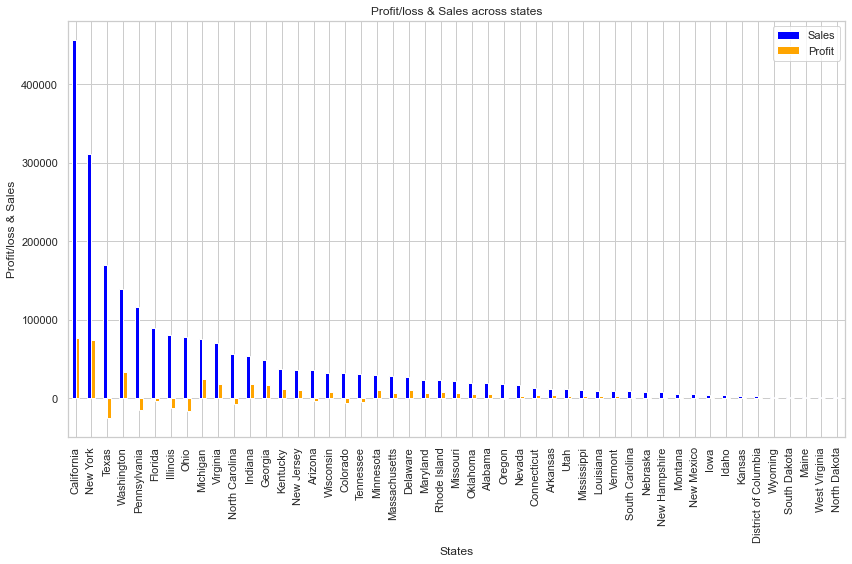

In [164]:
ps = data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['blue','orange'],figsize=(12,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

**observation**
THe HIGHEST states are California ans Newyork ,the LOWEST is for texas, pennsylvania, Ohio

##### LOSS or less Profit

In [165]:
data.nsmallest(10, 'Profit')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,East,Technology,Machines,4499.985,5,0.7,-6599.9780
683,Same Day,Corporate,United States,Burlington,North Carolina,South,Technology,Machines,7999.980,4,0.5,-3839.9904
9774,Standard Class,Consumer,United States,San Antonio,Texas,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
3011,Standard Class,Home Office,United States,Louisville,Colorado,West,Technology,Machines,2549.985,5,0.7,-3399.9800
4991,Standard Class,Corporate,United States,Chicago,Illinois,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845
3151,First Class,Consumer,United States,Newark,Ohio,East,Technology,Machines,1799.994,2,0.7,-2639.9912
5310,First Class,Consumer,United States,Houston,Texas,Central,Office Supplies,Binders,1525.188,6,0.8,-2287.7820
9639,Second Class,Consumer,United States,Concord,North Carolina,South,Furniture,Tables,4297.644,13,0.4,-1862.3124
1199,Standard Class,Consumer,United States,Houston,Texas,Central,Office Supplies,Binders,1088.792,4,0.8,-1850.9464
2697,Standard Class,Home Office,United States,Jacksonville,Florida,South,Technology,Machines,22638.480,6,0.5,-1811.0784


**observations**
-  The lowest profit (-6599.978) is at `Ohio` state in `Lanacaster` city at `Machines`
-  The profit is negative and that means production costs are more than your total revenue for a specific period
-  I think the reason is the Discount amout as it is 40% and above and it can get to 80% so it need to be less
-  most of them in Texas state

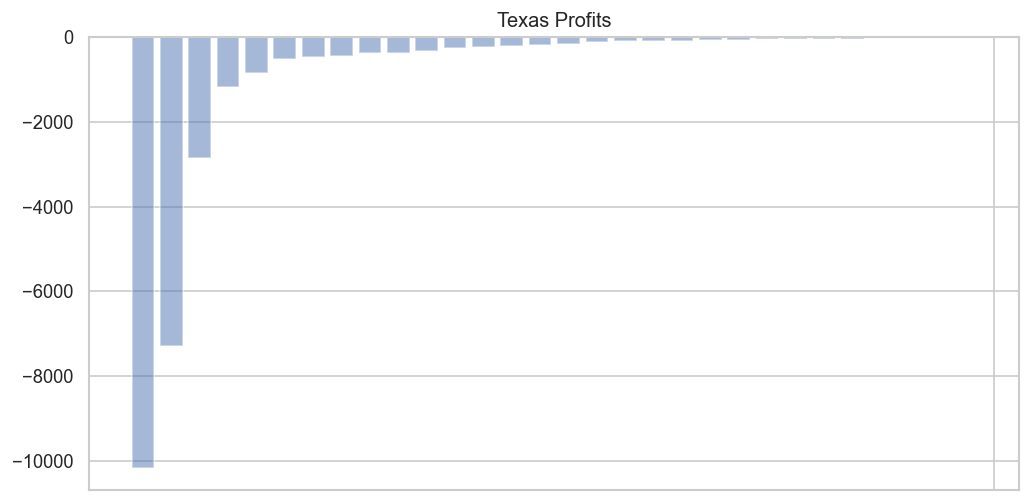

In [274]:
plt.figure(figsize=(10,5), dpi = 120)
z=data[data['State']=='Texas'].groupby('City')['Profit'].sum().sort_values()[:30]
plt.bar(z.index,z.values, align='center', alpha=0.5,)
plt.xticks('');
plt.title('Texas Profits');

**observation**
 Most of Texas cities has the Negative Profit !!

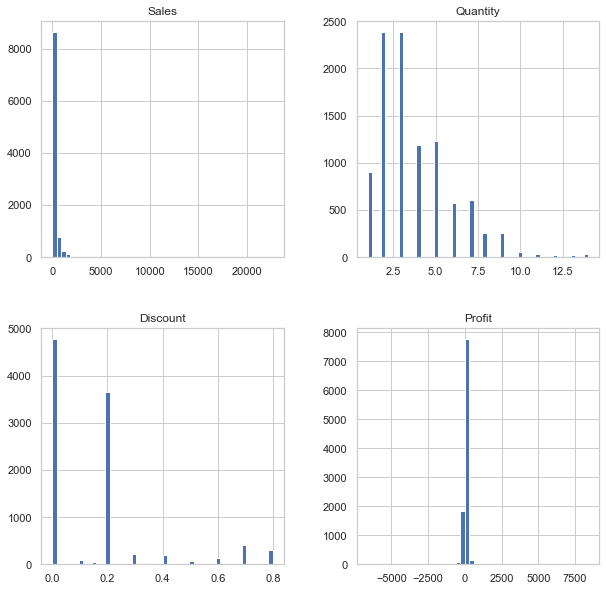

In [265]:
data.hist(figsize=(10,10),bins=50)
plt.show()

**Observation**
Most customers tends to buy quantity of 2 and 3
Discount give maximum is 0 to 20 percent

#### Correlation

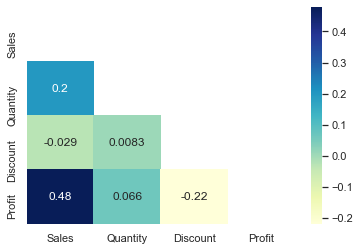

In [126]:
mask = np.triu(np.ones_like(data.corr()))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, mask=mask)

##### sales vs profit

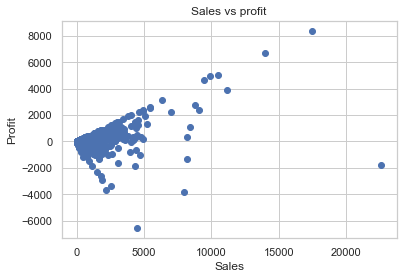

In [150]:
plt.scatter(x='Sales',y='Profit',data=data)
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Sales vs profit");


In [157]:
data.corr()["Sales"]["Profit"]

0.4790776384603207

 there is (0.47) positive correlation between profit and sales

##### profit vs Discount

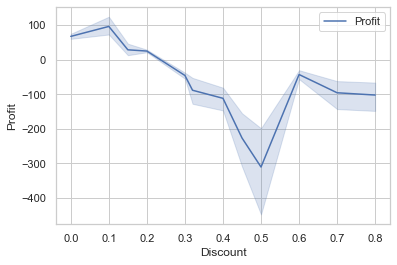

In [152]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=data)
plt.legend()
plt.show()

No correlation between profit and discount and it tend to be low negative correlation


In [158]:
data.corr()["Profit"]["Discount"]

-0.21993898249763688

##### profit vs Quantity

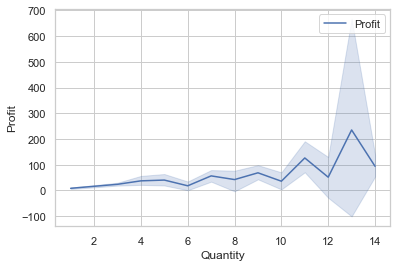

In [153]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=data)
plt.legend()
plt.show()

In [129]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
data['state_code'] = data.State.apply(lambda x: state_code[x])

In [ ]:
data.head()

In [130]:
state_data = data[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, 
    z = state_data.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'Viridis_r',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    title_font_family="Times New Roman",
    title_font_size = 22,
    title_font_color="black", 
    title_x=0.45, 
    geo_scope='usa',
    height=600,
)


fig.show()

In [131]:
state_data = data[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, 
    z = state_data.Profit, 
    locationmode = 'USA-states', 
    colorscale = 'Viridis_r',
    colorbar_title = 'profits in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise profits',
    title_font_family="Times New Roman",
    title_font_size = 22,
    title_font_color="black", 
    title_x=0.45, 
    geo_scope='usa',
    height=600,
)

fig.show()

#### `all Profit` and `all Sales`

In [126]:
from numerize import numerize
all_Profit=numerize.numerize(round(sum(data.Profit),2))
print("all_Profit",all_Profit)
all_Sales=numerize.numerize(round(sum(data.Sales),2))
print("all_Sales",all_Sales)


all_Profit 286.4K
all_Sales 2.3M


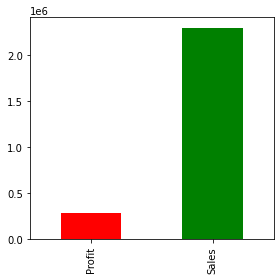

In [125]:
data[["Profit","Sales"]].sum().round(2).plot(kind='bar', figsize=(4,4),color=["red","green"] ,width=0.5)
plt.show()
